<a href="https://colab.research.google.com/github/Mark12481632/Imperial_MSc_Project/blob/main/code/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 2 of the MSc Project.

My research project is intending to use a Graphical Neural Network (GNN) to predict the solubility, in water, of small organic molecules.
<BR><BR>

The ESOL dataset: https://moleculenet.org/datasets-1, has been identified as a suitable source of data for this project.  It consists of the measured solubility of 1128 small organic molecules - if this is not enough data I may need to supplement this but can't know this until the GNN training stage.  The information in this dataset will need to be transformed into a format suitable for a GNN - i.e. a graph.
<BR><BR>
The analysis and transformation of the "small organic molecule" dataset will require specific packages:

1.   **RDKIT (details:https://www.rdkit.org/docs/index.html)**<BR>
     The RDKit is an open-source cheminformatics toolkit written in C++ that is also useable from Java or Python. It includes a collection of standard cheminformatics functionality for molecule I/O, substructure searching, chemical reactions, coordinate generation (2D or 3D), and fingerprinting.
2.   **Pytorch-Geometric (details: https://pytorch-geometric.readthedocs.io/en/latest/)**<BR>
     This is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

<BR>

This script and the dataset(s) used can be found in the following github repository: https://github.com/Mark12481632/Imperial_MSc_Project.git. Review the "README" file for guidance.
<BR><BR>

This script is comprised of the following sections: 
1.   Installation of the required packages.
2.   Loading and examining the "small organic molecule" dataset.
3.   RDKIT usage
4.   Data validation checks on the "small organic molecule" dataset.
5.   Initial analysis of the "small organic molecule" dataset.
6.   Creation of the output dataset needed fro the GNN.
7.   Summary.

<BR>

**This script was run in Google's Colab environment.**





---


**Section 1: Installation of the required packages.**

One of the reasons I used Google's Colab for running this script was because I had problems installing RDKIT on my Apple PC.  I was lucky enough to find guidance for its installation in Colab on the Internet.
<BR><BR>

As a prerequisite Condacolab was needed.

<BR>

"%%capture" is used to suppress cell output as this can be large.


In [ ]:
%%capture

# Install CONDACOLAB
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
%%capture

# Install RDKIT
!conda install -c rdkit rdkit

In [ ]:
%%capture

# Install pytorch-geometric
!pip install torch_geometric



---


**Section 2: Loading and examining the "small organic molecule" dataset**<BR>

- The ESOL dataset has already been loaded into the github repository - we
  can load it using Pandas.
- Remove the column "ESOL predicted log solubility in mols per litre" as this is the result of another regression model.

The column descriptions follow:


1.   Compound ID:<BR>
     Name of the compund.
2.   ESOL predicted log solubility in mols per litre:<BR>
     Predicted solubility using regression model - we will remove this.
3.   Minimum Degree:<BR>
4.   Molecular Weight:<BR>
5.   Number of H-Bond Donors:<BR>
6.   Number of Rings:<BR>
7.   Number of Rotatable Bonds:<BR>
8.   Polar Surface Area:<BR>
9.   measured log solubility in mols per litre:<BR>
10.  smiles:<BR>



In [ ]:
# Load the "ESOL" dataset and show attributes.

import pandas as pd

github_esol_url = "https://raw.githubusercontent.com/Mark12481632/Imperial_MSc_Project/main/chem_data/esol_raw.csv"
esol_data = pd.read_csv(github_esol_url)

# Display sample from data:
esol_data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [ ]:
# Remove column "ESOL predicted log solubility in mols per litre"
del esol_data['ESOL predicted log solubility in mols per litre']
esol_data.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1




---


**Section 3: Using RDKIT**

In this section we demonstrate some of the functionality provided by the RDKIT package.
1.   Use RDKIT to display molecules in 2D structure
2.   Use RDKIT to check for valid molecules.
3.   Use RDKIT to determine molecule length.
4.   Use RDKIT to search for similar molecule substructures.

NOTE: This is not a tutorial on RDKIT but just showing what it can do and it will be used in the future.



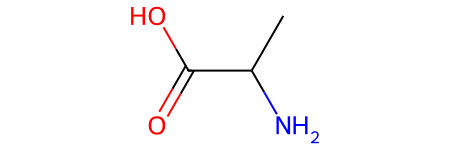

In [ ]:
# 1. Display molecule in 2D structure

from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d


def draw2D(m, disp_h=450, disp_w=150):
  """
  This is a simple function that displays a SMILES format molecule
  as a 2D structure
  """
  molSize=(disp_h, disp_w) 
  mc = Chem.Mol(m.ToBinary())
  if not mc.GetNumConformers():
    rdd.Compute2DCoords(mc)
  drawer = draw2d.MolDraw2DSVG(molSize[0], molSize[1])
  drawer.DrawMolecule(mc)
  drawer.FinishDrawing()
  svg = drawer.GetDrawingText()
  display(SVG(svg.replace('svg:', '')))


# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

# Display molecule
draw2D(example_molecule)

In [ ]:
# 2a. Check invalid molecule.

#   Invalid molecules create a "SMILES Parse Error" as shown below.
#   Also, the object returned for an invalid molecule in None.
invalid_smiles_molecule = 'CO(C)C'                # Such a molecule can't exist
print(Chem.MolFromSmiles(invalid_smiles_molecule))

None


[17:25:23] Explicit valence for atom # 1 O, 3, is greater than permitted


In [ ]:
# 2b. Check valid molecule.

#   Valid molecules create no error messages as shown below.
#   Also, the object returned for a valid molecule in not None.
valid_smiles_molecule = 'O'                   # This is the water molecule.
print(Chem.MolFromSmiles(valid_smiles_molecule))


In [ ]:
# 3. Determine molecule length

# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

# Determine number of atoms (=molecule length)
print("Molecule length:", example_molecule.GetNumAtoms())

Molecule length: 6


In [ ]:
# 4. Substructure searches make use of SMARTS (ref:https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
#    a Language for Describing Molecular Patterns



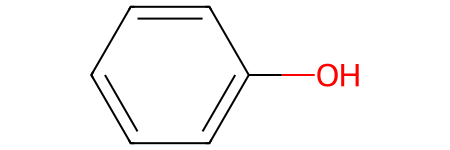

False

In [ ]:
xx = Chem.MolFromSmiles('Oc1ccccc1')

draw2D(xx)

patt = Chem.MolFromSmarts('c1ccccc1')

xx.HasSubstructMatch(patt)